# Deep recurrent neural networks (RNNs)

They are extensions of the basic RNN architecture that consist of multiple layers of recurrent units stacked on top of each other.

Deep RNNs extend the basic RNN architecture by stacking multiple recurrent layers on top of each other. Each layer in the network processes sequential data and passes its output to the next layer in the stack.

### Architecture:

Each layer in a deep RNN consists of recurrent units (such as vanilla RNNs, LSTMs, or GRUs) that process sequential data and maintain hidden states over time.

The output of one layer serves as the input to the next layer in the stack. This hierarchical structure allows the network to learn complex hierarchical representations of sequential data.

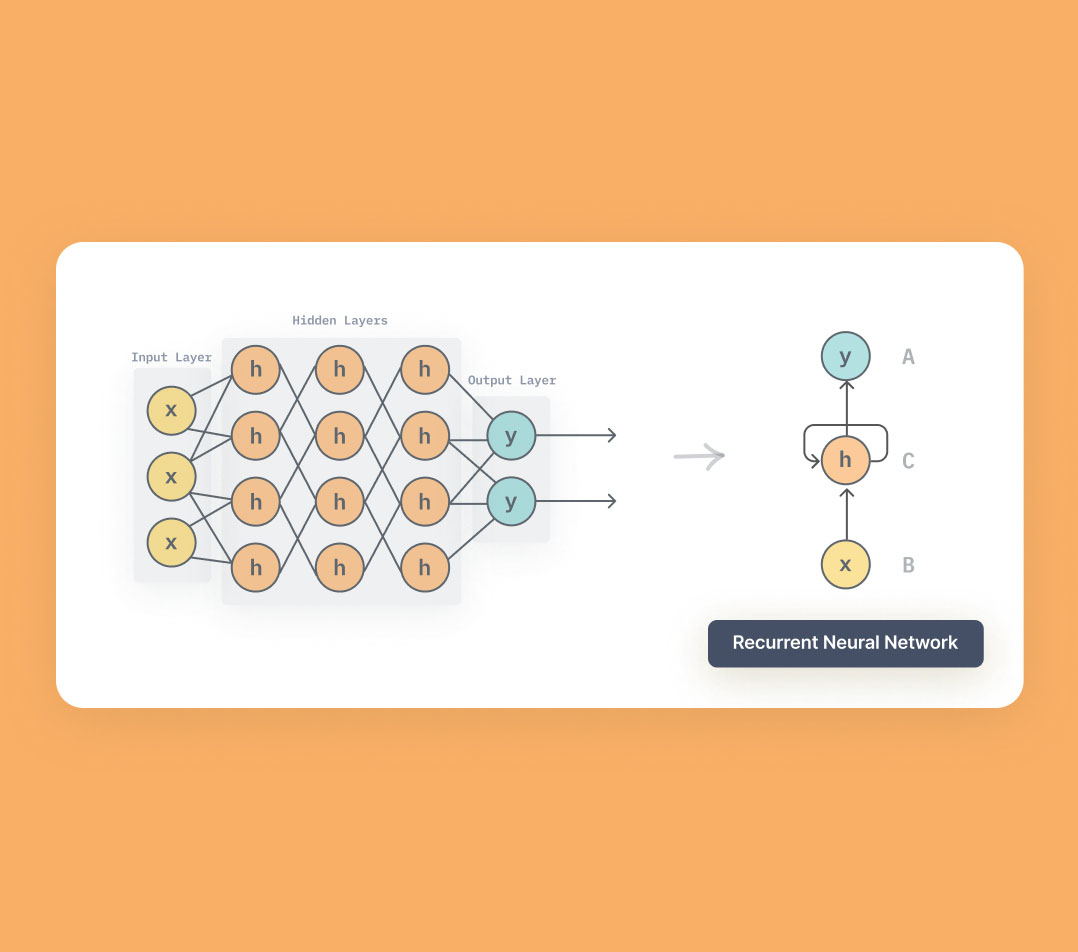

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM,GRU

In [2]:
# Load the IMDb dataset
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=10000)

# Pad sequences to have the same length
train_input = pad_sequences(train_input, maxlen=100)
test_input = pad_sequences(test_input, maxlen=100)

17464789/17464789 [==============================] - 2s 0us/step


## Deep SimpleRNN

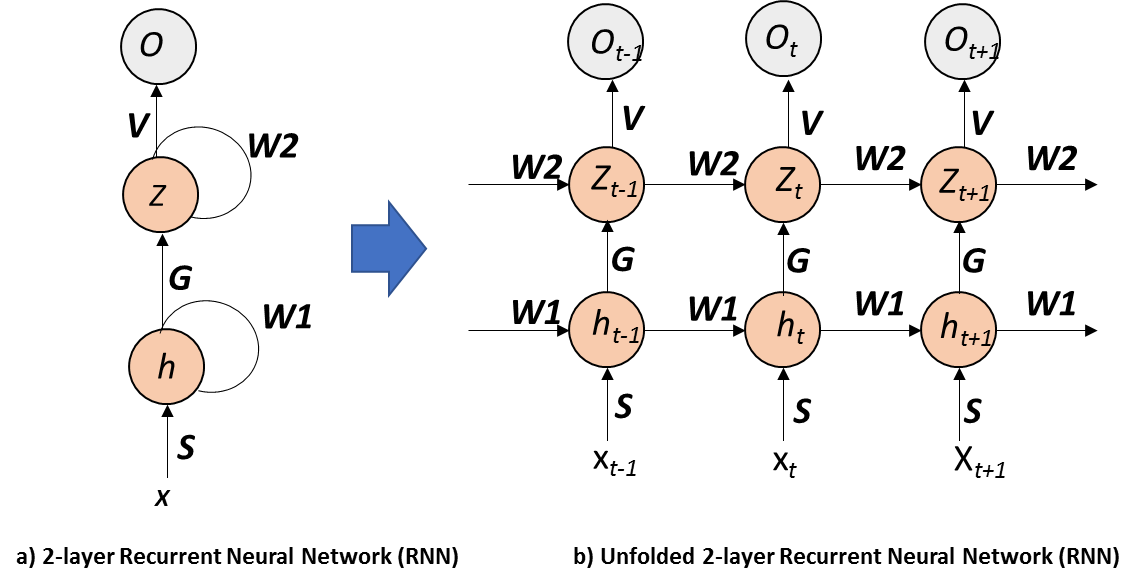

In [3]:
# Define the RNN model
model_1 = Sequential([
    Embedding(10000, 32, input_length=100), # Embedding layer to convert words to vectors
    SimpleRNN(5, return_sequences=True),   # RNN layer with 5 units
    SimpleRNN(5),                          # Another RNN layer with 5 units
    Dense(1, activation='sigmoid')          # Output layer for binary classification
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 5)            190       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Train the model
history_1 = model_1.fit(train_input, train_target, epochs=5, batch_size=32, validation_data=(test_input,test_target))

Epoch 1/5
782/782 [==============================] - 185s 232ms/step - loss: 0.5137 - accuracy: 0.7621 - val_loss: 0.4598 - val_accuracy: 0.8001
Epoch 2/5
782/782 [==============================] - 157s 201ms/step - loss: 0.3690 - accuracy: 0.8507 - val_loss: 0.4229 - val_accuracy: 0.8208
Epoch 3/5
782/782 [==============================] - 159s 203ms/step - loss: 0.2644 - accuracy: 0.9007 - val_loss: 0.4471 - val_accuracy: 0.8230
Epoch 4/5
782/782 [==============================] - 159s 204ms/step - loss: 0.1910 - accuracy: 0.9318 - val_loss: 0.5178 - val_accuracy: 0.8060
Epoch 5/5
782/782 [==============================] - 158s 201ms/step - loss: 0.1325 - accuracy: 0.9566 - val_loss: 0.5893 - val_accuracy: 0.7982


## Deep LSTM


In [6]:
# Define the LSTM model
model_2 = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=True),
    LSTM(5),
    Dense(1, activation='sigmoid')
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 5)            760       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320986 (1.22 MB)
Trainable params: 320986 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history_2 = model_2.fit(train_input, train_target, epochs=5, batch_size=32, validation_data=(test_input,test_target))

Epoch 1/5
782/782 [==============================] - 31s 35ms/step - loss: 0.4573 - accuracy: 0.7890 - val_loss: 0.3920 - val_accuracy: 0.8326
Epoch 2/5
782/782 [==============================] - 17s 21ms/step - loss: 0.2811 - accuracy: 0.8897 - val_loss: 0.3557 - val_accuracy: 0.8450
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2131 - accuracy: 0.9207 - val_loss: 0.4064 - val_accuracy: 0.8322
Epoch 4/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1594 - accuracy: 0.9444 - val_loss: 0.4306 - val_accuracy: 0.8365
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1232 - accuracy: 0.9595 - val_loss: 0.4866 - val_accuracy: 0.8284


## Deep GRU

In [9]:
# Define the GRU model
model_3 = Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=True),
    GRU(5),
    Dense(1, activation='sigmoid')
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru (GRU)                   (None, 100, 5)            585       
                                                                 
 gru_1 (GRU)                 (None, 5)                 180       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320771 (1.22 MB)
Trainable params: 320771 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history_3 = model_3.fit(train_input, train_target, epochs=5, batch_size=32, validation_data=(test_input,test_target))

Epoch 1/5
782/782 [==============================] - 31s 36ms/step - loss: 0.4783 - accuracy: 0.7612 - val_loss: 0.3782 - val_accuracy: 0.8356
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2884 - accuracy: 0.8858 - val_loss: 0.3578 - val_accuracy: 0.8468
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2138 - accuracy: 0.9219 - val_loss: 0.3822 - val_accuracy: 0.8406
Epoch 4/5
782/782 [==============================] - 15s 20ms/step - loss: 0.1598 - accuracy: 0.9452 - val_loss: 0.4348 - val_accuracy: 0.8387
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1225 - accuracy: 0.9592 - val_loss: 0.4957 - val_accuracy: 0.8292


### Advantages:

1. **Hierarchical Representation**: Deep RNNs can learn hierarchical representations of sequential data, capturing both low-level and high-level features across multiple layers.
2. **Increased Capacity**: Stacking multiple layers increases the model's capacity to learn complex patterns and dependencies in sequential data.
3. **Improved Performance**: Deep RNNs can potentially achieve better performance on tasks that require capturing long-term dependencies or learning hierarchical structures in data.

### Disadvantage:

1. **Complex Architecture**: Stacking multiple layers increases the model's capacity increasing Time and Space Complexity of the model

2. **Training**: Training deep RNNs involves backpropagation through time (BPTT), where gradients are propagated backward through the network to update the model's parameters.

  -  Gradient vanishing and exploding problems can occur during training, especially in deep networks.
  - Techniques like gradient clipping, batch normalization, and careful initialization of weights can help mitigate these issues.

### Applications:

Deep RNNs are used in various applications, including natural language processing (NLP), speech recognition, machine translation, time series analysis, and sequence prediction tasks.

They are especially useful in tasks where capturing long-term dependencies or learning hierarchical structures in data is crucial.
